# EDA: Hands-on Lecture


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training")

print("Path to dataset files:", path)

/home/blueberry/Picsart-Academy/.venv/lib64/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/blueberry/.cache/kagglehub/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/versions/1


In [4]:
!ls /home/blueberry/.cache/kagglehub/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/versions/1

dirty_cafe_sales.csv


In [5]:
os.listdir(path)

['dirty_cafe_sales.csv']

In [6]:
cafe_df = pd.read_csv(os.path.join(path, "dirty_cafe_sales.csv"))

In [7]:
cafe_df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [8]:
set(cafe_df['Payment Method'])

{'Cash', 'Credit Card', 'Digital Wallet', 'ERROR', 'UNKNOWN', nan}

In [9]:
set(cafe_df['Location'])

{'ERROR', 'In-store', 'Takeaway', 'UNKNOWN', nan}

In [10]:
cafe_df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [11]:
cafe_df = cafe_df.replace(to_replace='ERROR', value=np.nan)
cafe_df = cafe_df.replace(to_replace='UNKNOWN', value=np.nan)

In [12]:
cafe_df.head(20)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [13]:
import pandas as pd
import numpy as np
import random 

cafe_df = cafe_df.replace(['ERROR', 'UNKNOWN'], np.nan)

cafe_df['Quantity'] = pd.to_numeric(cafe_df['Quantity'], errors='coerce')
cafe_df['Price Per Unit'] = pd.to_numeric(cafe_df['Price Per Unit'], errors='coerce')
cafe_df['Total Spent'] = pd.to_numeric(cafe_df['Total Spent'], errors='coerce')

cafe_df['Transaction Date'] = pd.to_datetime(cafe_df['Transaction Date'], errors='coerce')

# Map A: Item -> Price
item_to_price = cafe_df.dropna(subset=['Item', 'Price Per Unit']).drop_duplicates('Item')
item_price_map = item_to_price.set_index('Item')['Price Per Unit'].to_dict()

# Price -> List of Items
price_to_items_list = {}
for item, price in item_price_map.items():
    if price not in price_to_items_list:
        price_to_items_list[price] = []
    price_to_items_list[price].append(item)

median_date = cafe_df['Transaction Date'].median()

def logical_repair(row):
    if pd.isna(row['Price Per Unit']) and pd.notna(row['Item']):
        row['Price Per Unit'] = item_price_map.get(row['Item'])

    if pd.isna(row['Item']) and pd.notna(row['Price Per Unit']):
        possible_items = price_to_items_list.get(row['Price Per Unit'])
        if possible_items:
            row['Item'] = random.choice(possible_items)

    if pd.isna(row['Total Spent']):
        if pd.notna(row['Quantity']) and pd.notna(row['Price Per Unit']):
            row['Total Spent'] = row['Quantity'] * row['Price Per Unit']

    if pd.isna(row['Quantity']):
        if pd.notna(row['Total Spent']) and pd.notna(row['Price Per Unit']):
            if row['Price Per Unit'] != 0:
                row['Quantity'] = row['Total Spent'] / row['Price Per Unit']

    if pd.isna(row['Price Per Unit']):
        if pd.notna(row['Total Spent']) and pd.notna(row['Quantity']):
            if row['Quantity'] != 0:
                row['Price Per Unit'] = row['Total Spent'] / row['Quantity']

    if pd.isna(row['Payment Method']):
        if row['Location'] == 'Takeaway':
            row['Payment Method'] = random.choice(['Credit Card', 'Digital Wallet'])
        elif row['Location'] == 'In-store' and row['Total Spent'] < 5.0:
            row['Payment Method'] = 'Cash'
        else:
            row['Payment Method'] = cafe_df['Payment Method'].mode()[0]

    if pd.isna(row['Location']):
        if row['Payment Method'] in ['Digital Wallet', 'Credit Card']:
            row['Location'] = 'Takeaway'
        else:
            row['Location'] = 'In-store'

    if pd.isna(row['Transaction Date']):
        # Option A
        row['Transaction Date'] = median_date
        
        # Option B 
        # row['Transaction Date'] = random.choice(cafe_df['Transaction Date'].dropna().tolist())

    return row

cafe_df_cleaned = cafe_df.apply(logical_repair, axis=1)

print(cafe_df_cleaned.head())

  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee       2.0             2.0          4.0   
1    TXN_4977031    Cake       4.0             3.0         12.0   
2    TXN_4271903  Cookie       4.0             1.0          4.0   
3    TXN_7034554   Salad       2.0             5.0         10.0   
4    TXN_3160411  Coffee       2.0             2.0          4.0   

   Payment Method  Location Transaction Date  
0     Credit Card  Takeaway       2023-09-08  
1            Cash  In-store       2023-05-16  
2     Credit Card  In-store       2023-07-19  
3  Digital Wallet  Takeaway       2023-04-27  
4  Digital Wallet  In-store       2023-06-11  


In [14]:
cafe_df_cleaned.head(29)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Takeaway,2023-03-31
6,TXN_4433211,Cake,3.0,3.0,9.0,Credit Card,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,In-store,2023-10-28
8,TXN_4717867,Cake,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Digital Wallet,In-store,2023-12-31


In [15]:
print(item_price_map)

{'Coffee': 2.0, 'Cake': 3.0, 'Cookie': 1.0, 'Salad': 5.0, 'Smoothie': 4.0, 'Sandwich': 4.0, 'Juice': 3.0, 'Tea': 1.5}


<Axes: xlabel='Item', ylabel='Payment Method'>

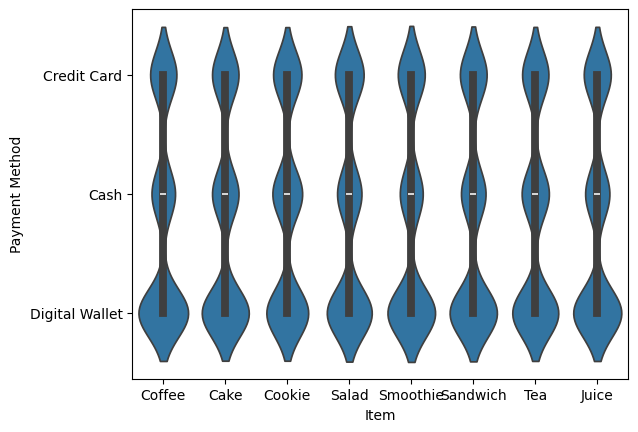

In [16]:
sns.violinplot(x="Item", y="Payment Method", data=cafe_df_cleaned)

In [20]:
item_revenue = cafe_df_cleaned.groupby('Item')['Total Spent'].sum()

In [21]:
print(item_revenue)

Item
Cake        11421.0
Coffee       7756.0
Cookie       3585.0
Juice       11610.0
Salad       19075.0
Sandwich    14836.0
Smoothie    14888.0
Tea          5433.0
Name: Total Spent, dtype: float64


<Axes: xlabel='Item'>

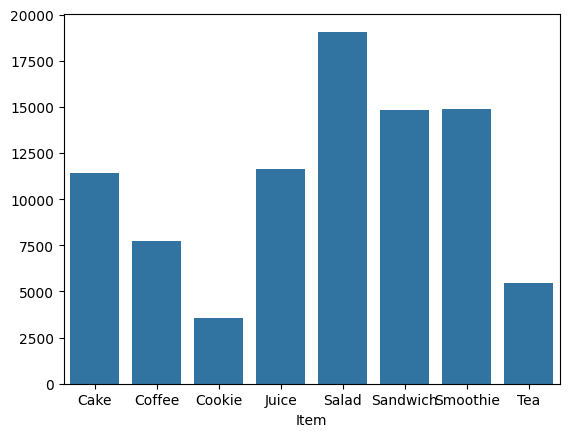

In [22]:
sns.barplot(x=item_revenue.index, y=item_revenue.values)

<Axes: xlabel='Total Spent', ylabel='Count'>

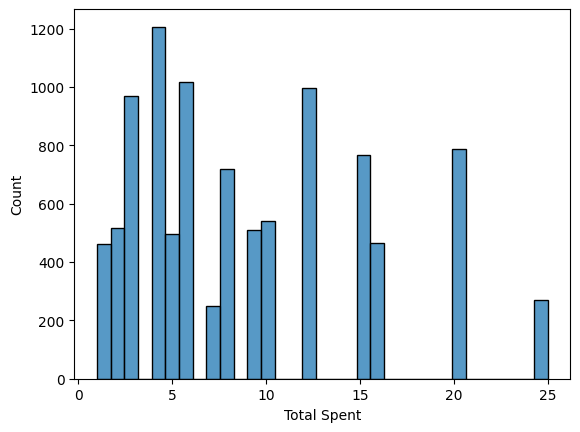

In [24]:
sns.histplot(data=cafe_df_cleaned, x="Total Spent")

<Axes: xlabel='Payment Method', ylabel='Total Spent'>

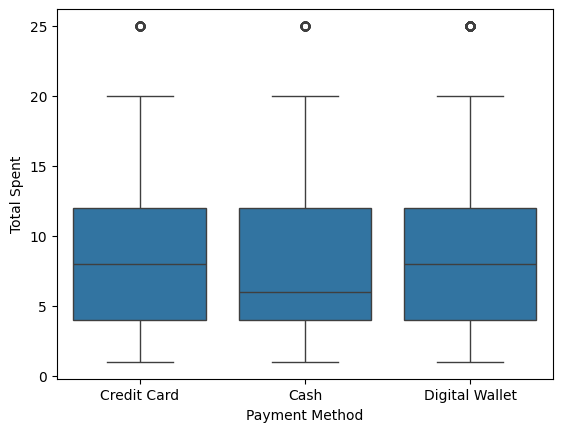

In [25]:
sns.boxplot(x="Payment Method", y="Total Spent", data=cafe_df_cleaned)

<Axes: xlabel='Location', ylabel='Total Spent'>

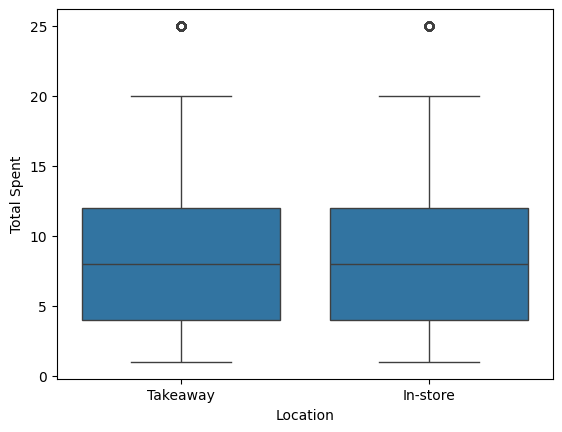

In [26]:
sns.boxplot(x="Location", y="Total Spent", data=cafe_df_cleaned)

<Axes: xlabel='Item', ylabel='Location'>

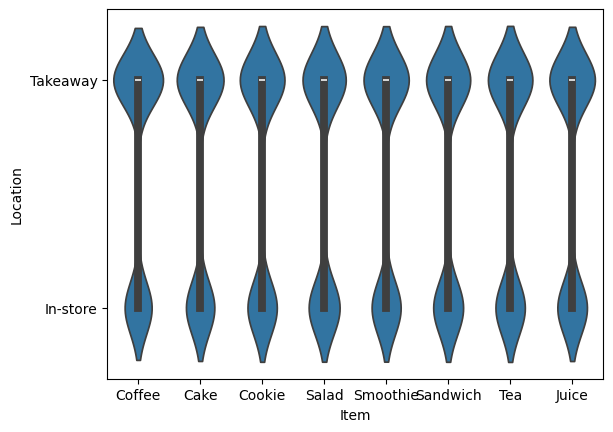

In [30]:
sns.violinplot(x="Item", y="Location", data=cafe_df_cleaned)